In [15]:
function f(x)      #Función propuesta a integrar para el método de Simpson
    x^3+x^2+1
end

f (generic function with 1 method)

El valor exacto de esta integral es 55185/4 que aproximadamente es 13796.3

# Método de Simpson

$$\int _{ a }^{ b }{ f(x)dx\approx \frac { b-a }{ 6 } \left[ f(a)+4f\left( \frac { a+b }{ 2 }  \right) +f(b) \right]  } $$

In [16]:
function metodo_de_Simpson(f,a,b,n) #Función que implementa el método de Simpson, sus entradas son la función a integrar, los extremos del intervalo y el número de segmentos en que se va a dividir el intervalo original.
    intervalo=(b-a)/n               #Considerando que los segmentos tengan la misma longitud, podemos obtener esta longitud haciendo el cociente de la resta de los extremos del intervalo entre el número de segmentos en que queremos separar el intervalo.
    suma=0                           #En suma se va a ir guardando el valor de la implementación del método del Simpson para cada segmento del intervalo. Inicializamos suma como cero.
    x=zeros(1,n)                     #Aquí se van a ir guardando los valores de los puntos para cada segmento.
    x[1]=a                           #El primer punto del intervalo es el extremo a
    for i in 2:n                     #Con este ciclo for vamos a ir avanzando sobre los puntos del intervalo
        x[i]=x[i-1]+intervalo        #El punto nuevo del intervalo se va a obtener sumando el punto anterior del intervalo (que para la primera vuelta del ciclo es a) más la longitud del segmento.
        suma = suma + (1/6)*(x[i]-x[i-1])*(f(x[i-1])+4*f((x[i-1]+x[i])/2)+f(x[i]))    #Aquí vamos a anexar a suma el valor obtenindo aplicando la fórmula mostrada arriba para cada segmento del intervalo.
    end
    print(suma)                       #Finalmente la función nos va a arrojar el valor de la suma, que corresponde a la aproximación de la integral utilizando el método de Simpson.
end

metodo_de_Simpson (generic function with 1 method)

In [17]:
metodo_de_Simpson(f,0,2pi,10)    #Aplicando el método de Simpson a la función f, sobre el intervalo [0,2pi], dividido en 10 segmentos, obtenemos el valor de la aproximación para la integral.

321.57148715260035

In [18]:
metodo_de_Simpson(f,0,15,100)     #Aplicando el método de Simpson a la función f, sobre el intervalo [0,2pi], dividido en 100 segmentos, obtenemos el valor de la aproximación para la integral.

13263.979626562588

## Ejercicio 4: Implementar método de interpolación de Lagrange en Julia. La función deberá recibir la lista de puntos $(x_k,y_k)$ y el lugar donde evaluamos el polinomio, note que es particularmente útil si los inputs son las listas de las $x$'s y de las $y$'s separadamente, es decir, de la misma forma en como la función plot recibe los argumentos; esto servira para verificar nuestros resultados. EJ.: Interpolador(listx,listy,x).

Para los ejercicios anteriores evalue la función que interpola en una variable simbólica, para que nos permita ver la forma explicita del polinomio. Ej: Interpolador(listx,listy,Sym("x")).

Dado un conjunto de $k+1$ puntos

$$(x_0,y_0),\ldots,(x_j,y_j),\ldots,(x_k,y_k)$$

donde las $x_j$ no son iguales, la interpolación polinomial en la forma de Lagrange es una combinación lineal

$$L(x):= \sum_{j=0}^{k}y_jl_j(x)$$

de las bases polinomiales de Lagrange

$$l_j(x) = \prod_{0 \le m \le k \atop m \ne j} \frac{x-x_m}{x_j-x_m}.$$

In [5]:
using SymPy   #Utilizamos SymPy para hacer a X variable simbólica

In [19]:
X=Sym("X")
function método_de_interpolación_de_Lagrange_Simbólica(x,y,X)     #Función para método de interpolación de Lagrange cuyas entradas son: la lista de las x´s, la lista de las y´s y el punto simbólico X, en donde se evaluará el polinomio.
    X=Sym("X")   #Hacemos a X variable simbólica
    n=length(x)  #n va a ser el número de elementos de la lista x, que es igual al número de elementos de la lista y
    L = 0           #Inicializamos L igual a cero
    for j in 1:n    #Ciclo for que va ir recorriendo los puntos de las listas
        productos_numerador=1   #Inicializamos el producto del numerador de las bases polinomiales de Lagrange como 1
        productos_denominador=1 #Inicializamos el producto del denominador de las bases polinomiales de Lagrange como 1
        for i in 1:n  #Con esto ciclo vamos a ir recorriendo los elementos de las listas x y y.  
            if j !== i   #Si j es distinto de i se van a realizan las siguientes multiplicaciones para el numerador y el denominador, respectivamente.
            productos_numerador = productos_numerador*(X-x[i])
            productos_denominador = productos_denominador*(x[j]-x[i])
            end
        end
    L = L + (productos_numerador/productos_denominador)*y[j]  #Posteriormente se va ir sumando a L el producto de la base polinomial de Lagrange [j] con el respectivo y[j]
    L=simplify(L)    #Para simplicar la expresión que arroje el método de interpolación de Lagrange
end 
L     #La función va arrojar el valor de L
end

método_de_interpolación_de_Lagrange_Simbólica (generic function with 1 method)

## Interpole las funciones $\cos(x)$, tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.

In [20]:
x=linspace(0,2pi,10)    #Creamos el arreglo de los 10 puntos distribuidos uniformemente en entre 0 y 2pi
y=cos.(x)      #Los puntos y serán las correspondientes evaluaciones del coseno en los puntos de x

10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [21]:
método_de_interpolación_de_Lagrange_Simbólica(x,y,X)    #Implementamos el método de interpolación utilizando las listas x y y creadas arriba y tomamos a X como variable simbólica. El output arroja el polinomio de interpolación.

                      9                       8                         7     
6.83047368665868e-18*X  - 1.9797933636022e-5*X  + 0.000497576342935509*X  - 0.

                   6                        5                       4         
00411366974808167*X  + 0.00878850466173803*X  + 0.0243778891541633*X  + 0.0201

              3                     2                              
425548286519*X  - 0.51254334976388*X  + 0.00313254720752185*X + 1.0

In [23]:
interpolacion=lambdify(método_de_interpolación_de_Lagrange_Simbólica(x,y,X)) #Para poder graficar L (polinomio) que es el resultado del método de interpolación, utilizamos lambdify para pasar la función en SymPy a una función en Julia, que llamaremos interpolacion.
otrax=linspace(0,2pi,100)  #Intervalo en x, que va tener 100 elementos distribuidos uniformemente entre 0 y 2pi.
otray=interpolacion(otrax)  #Aquí se guardarán los valores de la función interpolación en los puntos de otrax.

100-element Array{Float64,1}:
 1.0     
 0.99814 
 0.992187
 0.982189
 0.968202
 0.950296
 0.928553
 0.903068
 0.873948
 0.841313
 0.805297
 0.766044
 0.723715
 ⋮       
 0.766044
 0.805297
 0.841313
 0.873948
 0.903068
 0.928553
 0.950296
 0.968202
 0.982189
 0.992187
 0.99814 
 1.0     

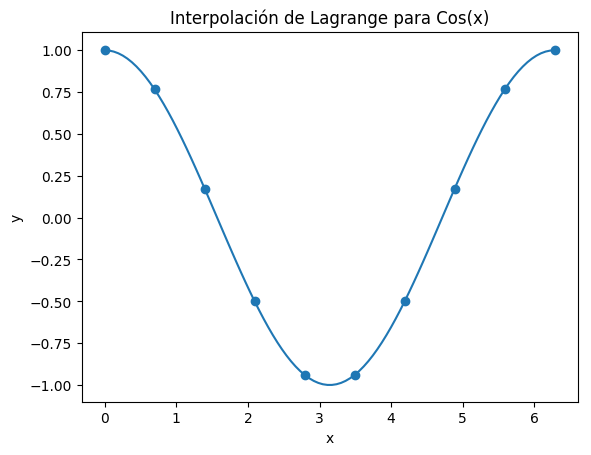

In [24]:
using PyPlot
xlabel("x")
ylabel("y")
title("Interpolación de Lagrange para Cos(x)")
scatter(x,y)       #Con scatter graficamos los puntos x y y mientras que con plot graficamos el polinomio interpolador considerando los puntos otrax y otray.
plot(otrax,otray)  
show()

## Interpole las funciones $\cos^2(x)$ , tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.

In [25]:
function cosenocuadrado(x)    #Definimos una función para el coseno cuadrado.
    cos(x)*cos(x)
end

cosenocuadrado (generic function with 1 method)

In [26]:
x=linspace(0,2pi,10)   #Creamos el arreglo de los 10 puntos distribuidos uniformemente en entre 0 y 2pi
y=cosenocuadrado.(x)   #Los puntos y serán las correspondientes evaluaciones del coseno cuadrado en los puntos de x 

10-element Array{Float64,1}:
 1.0      
 0.586824 
 0.0301537
 0.25     
 0.883022 
 0.883022 
 0.25     
 0.0301537
 0.586824 
 1.0      

In [27]:
método_de_interpolación_de_Lagrange_Simbólica(x,y,X)  #Implementamos el método de interpolación utilizando las listas x y y creadas arriba y tomamos a X como variable simbólica. El output arroja el polinomio de interpolación.

                        9                        8                      7     
- 4.66206934168767e-18*X  + 0.00125598518133163*X  - 0.031566350549511*X  + 0.

                 6                     5                     4                
313492883032336*X  - 1.54753813738561*X  + 3.89900431361713*X  - 4.56959608798

     3                     2                            
489*X  + 2.02232704563067*X  - 0.784017877200963*X + 1.0

In [29]:
interpolacion=lambdify(método_de_interpolación_de_Lagrange_Simbólica(x,y,X)) #Para poder graficar L (polinomio) que es el resultado del método de interpolación, utilizamos lambdify para pasar la función en SymPy a una función en Julia, que llamaremos interpolacion.
otrax=linspace(0,2pi,100)    #Intervalo en x, que va tener 100 elementos distribuidos uniformemente entre 0 y 2pi.
otray=interpolacion(otrax)    #Aquí se guardarán los valores de la función interpolación en los puntos de otrax.

100-element Array{Float64,1}:
 1.0     
 0.957281
 0.924683
 0.897247
 0.87118 
 0.843699
 0.812886
 0.777561
 0.737157
 0.691614
 0.64128 
 0.586824
 0.529154
 ⋮       
 0.586824
 0.64128 
 0.691614
 0.737157
 0.777561
 0.812886
 0.843699
 0.87118 
 0.897247
 0.924683
 0.957281
 1.0     

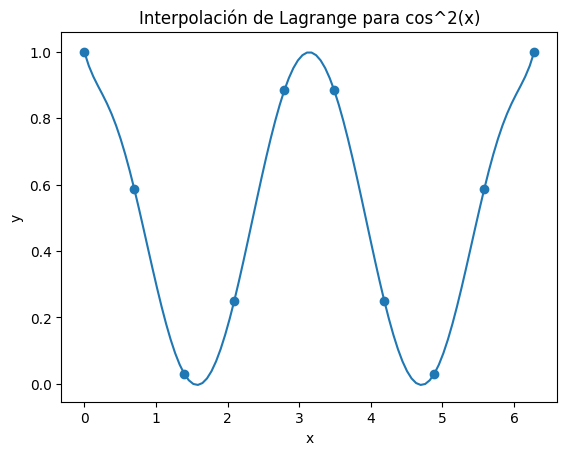

In [35]:
using PyPlot
xlabel("x")
ylabel("y")
title("Interpolación de Lagrange para cos^2(x)")
scatter(x,y) #Con scatter graficamos los puntos x y y mientras que con plot graficamos el polinomio interpolador considerando los puntos otrax y otray.
plot(otrax,otray)
show()

## Interpole los los siguientes puntos: [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)].Grafique los puntos a interpolar y la funcion interpoladora.

In [36]:
x=[0,2,3,4,5,6,7];     #Listas con los puntos mencionados arriba.
y=[10,-10,-4,0,5,20,-1];

In [37]:
método_de_interpolación_de_Lagrange_Simbólica(x,y,X) #Implementamos el método de interpolación utilizando las listas x y y creadas arriba y tomamos a X como variable simbólica. El output arroja el polinomio de interpolación.

       6        5         4         3          2            
  173*X    113*X    4957*X    2731*X    54571*X    83*X     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

In [39]:
interpolacion=lambdify(método_de_interpolación_de_Lagrange_Simbólica(x,y,X))   #Para poder graficar L (polinomio) que es el resultado del método de interpolación, utilizamos lambdify para pasar la función en SymPy a una función en Julia, que llamaremos interpolacion.
otrax=linspace(0,7,100)    #Intervalo en x, que va tener 100 elementos distribuidos uniformemente entre 0 y 2pi.
otray=interpolacion(otrax) #Aquí se guardarán los valores de la función interpolación en los puntos de otrax.

100-element Array{Float64,1}:
 10.0     
 10.2139  
 10.0604  
  9.59978 
  8.88731 
  7.97299 
  6.90205 
  5.71518 
  4.44876 
  3.13511 
  1.80274 
  0.476596
 -0.821768
  ⋮       
 22.3472  
 22.6606  
 22.6842  
 22.3634  
 21.6385  
 20.4442  
 18.7095  
 16.3572  
 13.3038  
  9.45907 
  4.72596 
 -1.0     

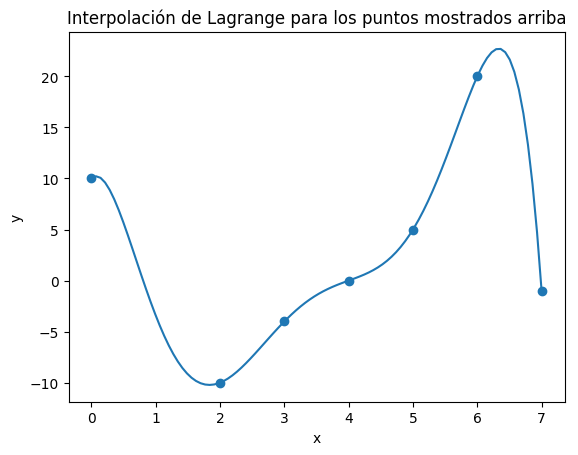

In [40]:
using PyPlot
xlabel("x")
ylabel("y")
title("Interpolación de Lagrange para los puntos mostrados arriba") #Con scatter graficamos los puntos x y y mientras que con plot graficamos el polinomio interpolador considerando los puntos otrax y otray.
scatter(x,y)
plot(otrax,otray)
show()

# Ejercicio 5: Comparen como convergen los métodos al valor exacto de la integral, respecto al ancho de las celdas, háganlo para $f(x)=-\sin(x)$, integrando en el intervalo $[0,2\pi]$. Es decir, para los tres métodos fijen el ancho de la celda y haganla cada vez mas pequeña, grafiquen el valor de la integral contra el inverso del acho de la celda, es decir $\int f(x) dx$ contra $1/\Delta x$. Hagan esto para los tres métodos y ponganlo en una gráfica y comenten lo que observan.

In [47]:
a=0    #Puntos extremos del intervalo
b=2pi

6.283185307179586

In [48]:
function f(x)  #Definimos la función de la cual queremos obtener la integral
    -sin(x)
end

f (generic function with 1 method)

In [49]:
function metodo_Riemann2(f,a,b)   #Función que implementa el método del rectángulo, sus entradas son la función a integrar, los extremos del intervalo y el número de segmentos en que se va a dividir el intervalo original.
    lista1=zeros(100)             #Creamos una lista de 100 elementos que guardará el valor obtenido para cada integral, variando el número de subintervalos del intervalo original y por consiguiente variando el ancho de los subintervalos.
    for n in 1:100                #Con este ciclo for vamos a ir avanzando en el número de subintervalos desde 1 hasta 100.
    intervalo=(b-a)/n             #Considerando que los segmentos tengan la misma longitud, podemos obtener esta longitud haciendo el cociente de la resta de los extremos del intervalo entre el número de segmentos en que queremos separar el intervalo.
    suma=0                         #En suma se va a ir guardando el valor de la implementación del método del rectángulo para cada segmento del intervalo. Inicializamos suma como cero.
    x=zeros(1,n)                   #Aquí se van a ir guardando los valores de cada segmento.
    x[1]=a                         #El primer punto del intervalo es el extremo a
    for i in 2:n                   #Con este ciclo for vamos a ir avanzando sobre los puntos del intervalo
        x[i]=x[i-1]+intervalo      #El punto nuevo del intervalo se va a obtener sumando el punto anterior del intervalo (que para la primera vuelta del ciclo es a) más la longitud del segmento.
        suma = suma + (x[i]-x[i-1])*f((x[i-1]+x[i])/2)   #Aquí vamos a anexar a suma el valor obtenindo aplicando la fórmula mostrada arriba para cada segmento del intervalo.
    end
    lista1[n] = suma                #Se va a ir guardando el valor de cada suma obtenida para cada n en la lista previamente creada.
    end
    print(lista1)                    #Finalmente la fución método_Riemann2 va a arrojar la lista con las sumas para cada n (número de subintervalos)
end

metodo_Riemann2 (generic function with 1 method)

In [50]:
metodo_Riemann2(f,a,b)      #Aplicando el método_Riemann2 a la función f, sobre el intervalo [0,2pi]

[0.0, -3.14159, -1.8138, -1.11072, -0.738633, -0.523599, -0.389453, -0.300559, -0.238775, -0.194161, -0.160925, -0.135517, -0.115667, -0.0998672, -0.0870898, -0.0766118, -0.0679137, -0.0606146, -0.0544304, -0.0491453, -0.0445933, -0.040645, -0.0371983, -0.0341717, -0.0314997, -0.029129, -0.027016, -0.0251248, -0.0234252, -0.0218924, -0.0205051, -0.0192456, -0.0180986, -0.0170512, -0.016092, -0.0152115, -0.0144014, -0.0136542, -0.0129638, -0.0123243, -0.0117311, -0.0111796, -0.0106661, -0.0101872, -0.00973984, -0.0093213, -0.00892916, -0.00856125, -0.00821561, -0.00789049, -0.00758429, -0.00729556, -0.00702302, -0.00676546, -0.00652181, -0.00629109, -0.0060724, -0.00586491, -0.00566788, -0.00548061, -0.00530247, -0.00513287, -0.00497128, -0.00481721, -0.00467018, -0.00452979, -0.00439563, -0.00426734, -0.00414459, -0.00402706, -0.00391446, -0.00380651, -0.00370297, -0.00360359, -0.00350817, -0.00341648, -0.00332834, -0.00324357, -0.00316199, -0.00308346, -0.00300781, -0.00293492, -0.002

In [52]:
p1= [-3.14159, -1.8138, -1.11072, -0.738633, -0.523599, -0.389453, -0.300559, -0.238775, -0.194161, -0.160925, -0.135517, -0.115667, -0.0998672, -0.0870898, -0.0766118, -0.0679137, -0.0606146, -0.0544304, -0.0491453, -0.0445933, -0.040645, -0.0371983, -0.0341717, -0.0314997, -0.029129, -0.027016, -0.0251248, -0.0234252, -0.0218924, -0.0205051, -0.0192456, -0.0180986, -0.0170512, -0.016092, -0.0152115, -0.0144014, -0.0136542, -0.0129638, -0.0123243, -0.0117311, -0.0111796, -0.0106661, -0.0101872, -0.00973984, -0.0093213, -0.00892916, -0.00856125, -0.00821561, -0.00789049, -0.00758429, -0.00729556, -0.00702302, -0.00676546, -0.00652181, -0.00629109, -0.0060724, -0.00586491, -0.00566788, -0.00548061, -0.00530247, -0.00513287, -0.00497128, -0.00481721, -0.00467018, -0.00452979, -0.00439563, -0.00426734, -0.00414459, -0.00402706, -0.00391446, -0.00380651, -0.00370297, -0.00360359, -0.00350817, -0.00341648, -0.00332834, -0.00324357, -0.00316199, -0.00308346, -0.00300781, -0.00293492, -0.00286464, -0.00279685, -0.00273145, -0.00266831, -0.00260734, -0.00254843, -0.00249149, -0.00243644, -0.0023832, -0.00233168, -0.00228182, -0.00223354, -0.00218677, -0.00214146, -0.00209754, -0.00205496, -0.00201366, -0.0019736];   #Guardando los puntos obtenidos en p1

In [53]:
function metodo_del_trapecio2(f,a,b)   #Función que implementa el método del trapecio, sus entradas son la función a integrar, los extremos del intervalo y el número de segmentos en que se va a dividir el intervalo original.
    lista2=zeros(100)              #Creamos una lista de 100 elementos que guardará el valor obtenido para cada integral, variando el número de subintervalos del intervalo original y por consiguiente variando el ancho de los subintervalos.
    for n in 1:100                 #Con este ciclo for vamos a ir avanzando en el número de subintervalos desde 1 hasta 100.
    intervalo=(b-a)/n              #Considerando que los segmentos tengan la misma longitud, podemos obtener esta longitud haciendo el cociente de la resta de los extremos del intervalo entre el número de segmentos en que queremos separar el intervalo.
    suma=0                         #En suma se va a ir guardando el valor de la implementación del método del del trapecio para cada segmento del intervalo. Inicializamos suma como cero.
    x=zeros(1,n)                   #Aquí se van a ir guardando los valores de cada segmento.
    x[1]=a                         #El primer punto del intervalo es el extremo a
    for i in 2:n                   #Con este ciclo for vamos a ir avanzando sobre los puntos del intervalo
        x[i]=x[i-1]+intervalo      #El punto nuevo del intervalo se va a obtener sumando el punto anterior del intervalo (que para la primera vuelta del ciclo es a) más la longitud del segmento.
       suma = suma + ((x[i]-x[i-1]))*((f(x[i-1])+f(x[i]))/2)   #Aquí vamos a anexar a suma el valor obtenindo aplicando la fórmula mostrada arriba para cada segmento del intervalo.
    end
    lista2[n]=suma                  #Se va a ir guardando el valor de cada suma obtenida para cada n en la lista previamente creada.
    end
    print(lista2)                   #Finalmente la fución método_del_trapecio_2 va a arrojar la lista con las sumas para cada n (número de subintervalos)
end 

metodo_del_trapecio2 (generic function with 1 method)

In [54]:
metodo_del_trapecio2(f,a,b)   #Aplicando el método_del_trapecio2 a la función f, sobre el intervalo [0,2pi]

[0.0, -1.92367e-16, -0.9069, -0.785398, -0.597566, -0.45345, -0.350885, -0.27768, -0.224375, -0.184658, -0.154407, -0.1309, -0.112305, -0.0973633, -0.0851867, -0.0751397, -0.0667573, -0.0596938, -0.0536881, -0.0485403, -0.0440953, -0.0402313, -0.0368518, -0.0338793, -0.0312513, -0.0289166, -0.0268334, -0.0249668, -0.0232879, -0.0217725, -0.0203999, -0.0191529, -0.0180167, -0.0169784, -0.0160272, -0.0151537, -0.0143495, -0.0136076, -0.0129217, -0.0122863, -0.0116966, -0.0111483, -0.0106377, -0.0101613, -0.00971612, -0.00929957, -0.00890922, -0.00854292, -0.00819873, -0.00787492, -0.0075699, -0.00728225, -0.00701068, -0.00675401, -0.00651117, -0.00628119, -0.00606318, -0.00585631, -0.00565984, -0.0054731, -0.00529544, -0.00512628, -0.00496511, -0.00481141, -0.00466473, -0.00452466, -0.0043908, -0.00426279, -0.00414029, -0.004023, -0.00391062, -0.00380289, -0.00369954, -0.00360035, -0.00350509, -0.00341356, -0.00332557, -0.00324094, -0.00315949, -0.00308108, -0.00300555, -0.00293276, -0.0

In [80]:
p2 = [-1.92367e-16, -0.9069, -0.785398, -0.597566, -0.45345, -0.350885, -0.27768, -0.224375, -0.184658, -0.154407, -0.1309, -0.112305, -0.0973633, -0.0851867, -0.0751397, -0.0667573, -0.0596938, -0.0536881, -0.0485403, -0.0440953, -0.0402313, -0.0368518, -0.0338793, -0.0312513, -0.0289166, -0.0268334, -0.0249668, -0.0232879, -0.0217725, -0.0203999, -0.0191529, -0.0180167, -0.0169784, -0.0160272, -0.0151537, -0.0143495, -0.0136076, -0.0129217, -0.0122863, -0.0116966, -0.0111483, -0.0106377, -0.0101613, -0.00971612, -0.00929957, -0.00890922, -0.00854292, -0.00819873, -0.00787492, -0.0075699, -0.00728225, -0.00701068, -0.00675401, -0.00651117, -0.00628119, -0.00606318, -0.00585631, -0.00565984, -0.0054731, -0.00529544, -0.00512628, -0.00496511, -0.00481141, -0.00466473, -0.00452466, -0.0043908, -0.00426279, -0.00414029, -0.004023, -0.00391062, -0.00380289, -0.00369954, -0.00360035, -0.00350509, -0.00341356, -0.00332557, -0.00324094, -0.00315949, -0.00308108, -0.00300555, -0.00293276, -0.00286259, -0.0027949, -0.00272958, -0.00266653, -0.00260564, -0.0025468, -0.00248994, -0.00243496, -0.00238178, -0.00233032, -0.00228052, -0.00223229, -0.00218558, -0.00214031, -0.00209644, -0.0020539, -0.00201265, -0.00197262]; #Guardando los puntos obtenidos en p2

In [56]:
function metodo_de_Simpson2(f,a,b) #Función que implementa el método de Simpson, sus entradas son la función a integrar, los extremos del intervalo y el número de segmentos en que se va a dividir el intervalo original.
    lista=zeros(100)                #Creamos una lista de 100 elementos que guardará el valor obtenido para cada integral, variando el número de subintervalos del intervalo original y por consiguiente variando el ancho de los subintervalos.
    for n in 1:100                  #Con este ciclo for vamos a ir avanzando en el número de subintervalos desde 1 hasta 100.
    intervalo=(b-a)/n               #Considerando que los segmentos tengan la misma longitud, podemos obtener esta longitud haciendo el cociente de la resta de los extremos del intervalo entre el número de segmentos en que queremos separar el intervalo.
    suma=0                           #En suma se va a ir guardando el valor de la implementación del método del Simpson para cada segmento del intervalo. Inicializamos suma como cero.
    x=zeros(1,n)                     #Aquí se van a ir guardando los valores de los puntos para cada segmento.
    x[1]=a                           #El primer punto del intervalo es el extremo a
    for i in 2:n                     #Con este ciclo for vamos a ir avanzando sobre los puntos del intervalo
        x[i]=x[i-1]+intervalo        #El punto nuevo del intervalo se va a obtener sumando el punto anterior del intervalo (que para la primera vuelta del ciclo es a) más la longitud del segmento.
        suma = suma + (1/6)*(x[i]-x[i-1])*(f(x[i-1])+4*f((x[i-1]+x[i])/2)+f(x[i]))    #Aquí vamos a anexar a suma el valor obtenindo aplicando la fórmula mostrada arriba para cada segmento del intervalo.
        end
   lista[n]=suma                     
    end
    print(lista)                    #Finalmente la fución método_de_Simpson2 va a arrojar la lista con las sumas para cada n (número de subintervalos)
end

metodo_de_Simpson2 (generic function with 2 methods)

In [57]:
metodo_de_Simpson2(f,a,b);   #Aplicando el método_de_Simpson2 a la función f, sobre el intervalo [0,2pi]

[0.0, -2.0944, -1.5115, -1.00228, -0.691611, -0.500216, -0.376597, -0.292933, -0.233975, -0.190993, -0.158752, -0.133978, -0.114546, -0.0990325, -0.0864555, -0.0761211, -0.0675282, -0.0603077, -0.054183, -0.0489436, -0.0444273, -0.0405071, -0.0370828, -0.0340742, -0.0314169, -0.0290582, -0.0269552, -0.0250721, -0.0233795, -0.0218524, -0.0204701, -0.0192147, -0.0180713, -0.0170269, -0.0160704, -0.0151923, -0.0143841, -0.0136387, -0.0129497, -0.0123117, -0.0117196, -0.0111692, -0.0106566, -0.0101786, -0.00973193, -0.00931406, -0.00892251, -0.00855514, -0.00820999, -0.0078853, -0.00757949, -0.00729113, -0.0070189, -0.00676164, -0.00651827, -0.00628779, -0.00606932, -0.00586204, -0.0056652, -0.0054781, -0.00530012, -0.00513068, -0.00496922, -0.00481527, -0.00466837, -0.00452808, -0.00439402, -0.00426582, -0.00414316, -0.00402571, -0.00391318, -0.0038053, -0.00370183, -0.00360251, -0.00350714, -0.00341551, -0.00332742, -0.00324269, -0.00316116, -0.00308267, -0.00300706, -0.0029342, -0.00286

In [58]:
p= [-2.0944, -1.5115, -1.00228, -0.691611, -0.500216, -0.376597, -0.292933, -0.233975, -0.190993, -0.158752, -0.133978, -0.114546, -0.0990325, -0.0864555, -0.0761211, -0.0675282, -0.0603077, -0.054183, -0.0489436, -0.0444273, -0.0405071, -0.0370828, -0.0340742, -0.0314169, -0.0290582, -0.0269552, -0.0250721, -0.0233795, -0.0218524, -0.0204701, -0.0192147, -0.0180713, -0.0170269, -0.0160704, -0.0151923, -0.0143841, -0.0136387, -0.0129497, -0.0123117, -0.0117196, -0.0111692, -0.0106566, -0.0101786, -0.00973193, -0.00931406, -0.00892251, -0.00855514, -0.00820999, -0.0078853, -0.00757949, -0.00729113, -0.0070189, -0.00676164, -0.00651827, -0.00628779, -0.00606932, -0.00586204, -0.0056652, -0.0054781, -0.00530012, -0.00513068, -0.00496922, -0.00481527, -0.00466837, -0.00452808, -0.00439402, -0.00426582, -0.00414316, -0.00402571, -0.00391318, -0.0038053, -0.00370183, -0.00360251, -0.00350714, -0.00341551, -0.00332742, -0.00324269, -0.00316116, -0.00308267, -0.00300706, -0.0029342, -0.00286395, -0.0027962, -0.00273083, -0.00266772, -0.00260677, -0.00254789, -0.00249097, -0.00243595, -0.00238273, -0.00233123, -0.00228139, -0.00223312, -0.00218637, -0.00214108, -0.00209717, -0.00205461, -0.00201332, -0.00197327]; #Guardando los puntos obtenidos en p

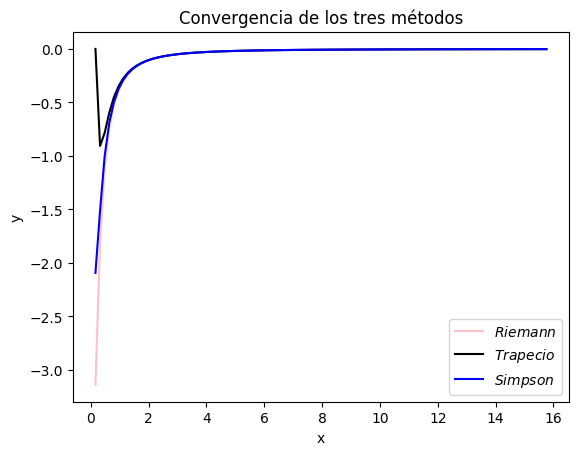

In [81]:
using PyPlot
using PyPlot
xlabel("x")
ylabel("y")
title("Convergencia de los tres métodos")
n=1:99
#Graficamos los puntos obtenidos con cada uno de los tres métodos contra el inverso de la longitud de los subintervalos
plot(n/2pi,p1, color = "pink", label = L"Riemann")  
legend()
plot(n/2pi,p2, color = "black", label = L"Trapecio")
legend()
plot(n/2pi,p, color = "blue", label = L"Simpson")
legend()
show()

Cuando aumentamos el número de intervalos, es decir, cuando $ \Delta x$ se va haciendo cada vez más pequeña, la aproximación de la integral va mejorando, ya que $\frac { 1 }{ \Delta x } =\frac { n }{ b-a } =\frac { n }{ 2\pi  } $ va aumentando su valor (eje x) mientras que la aproximación de la integral va convergiendo a 0, que es el valor exacto de la integral pedida.

En la gráfica también se aprecia que el método de Riemann es el que más tarda en converger al valor de la integral exacta.

Conforme aumenta el número de subintervalos (disminuye la longitud de los subintervalos) ya no se observa una diferencia en la convergencia de los métodos.

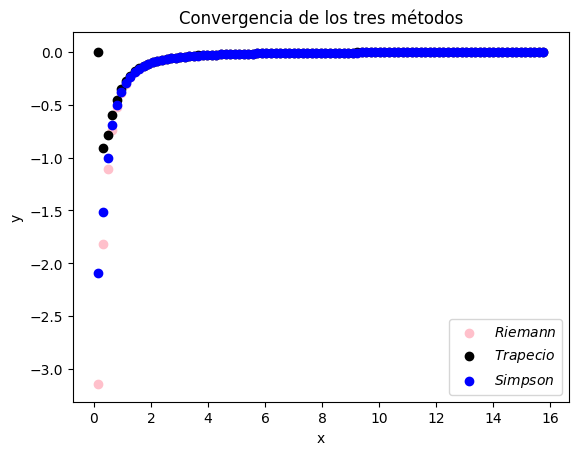

In [76]:
using PyPlot
using PyPlot
xlabel("x")
ylabel("y")
title("Convergencia de los tres métodos")
n=1:99
#Graficamos los puntos obtenidos con cada uno de los tres métodos contra el inverso de la longitud de los subintervalos
scatter(n/2pi,p1, color = "pink", label = L"Riemann")  
legend()
scatter(n/2pi,p2, color = "black", label = L"Trapecio")
legend()
scatter(n/2pi,p, color = "blue", label = L"Simpson")
legend()
show()